In [28]:
#configure project
%load_ext mypy_ipython
%mypy
%matplotlib inline

import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import re
import os

The mypy_ipython extension is already loaded. To reload it, use:
  %reload_ext mypy_ipython
    logs: str = ""
error: Name "logs" already defined on line 28  [no-redef]
    patternBreakLine: str = r'(<\/br>)(\d{4}-\d{2}-\d{
error: Name "patternBreakLine" already defined on line 29  [no-redef]
    patternBreakWord: str =r'(\d{4}-\d{2}-\d{2}T\d{2}:
error: Name "patternBreakWord" already defined on line 30  [no-redef]
    df: pd.DataFrame = pd.read_csv(StringIO(logs), hea
error: Name "df" already defined on line 42  [no-redef]
    levels: pd.DataFrame = df.groupby('level').size()
error: Name "levels" already defined on line 44  [no-redef]
    logs: str = ""
error: Name "logs" already defined on line 28  [no-redef]
    patternBreakLine: str = r'(<\/br>)(\d{4}-\d{2}-\d{
error: Name "patternBreakLine" already defined on line 29  [no-redef]
    patternBreakWord: str =r'(\d{4}-\d{2}-\d{2}T\d{2}:
error: Name "patternBreakWord" already defined on line 30  [no-redef]
    df: pd.DataFrame = pd.rea

Type checking failed


In [29]:
#prepare data
logs: str = ""
patternBreakLine: str = r'(<\/br>)(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}.\d{3}\+\d{2}:\d{2})'
patternBreakWord: str =r'(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}.\d{3}\+\d{2}:\d{2})( +)(\w+)( +)(\d+)( +)(---)( +)(\[)(\S+)(\])( +)(\S+)( +:)'

with open('LogThrower/input.log') as input:
    logs=input.read()

logs = logs.replace('\n', '</br>') #hacky thing to do, but this way is possible to preaty print data
logs = logs.replace('\\','/') #prevents errors
logs = logs.replace('\t', '    ') #replaces tabs with spaces
logs = logs.replace(',','@')
logs = re.sub(patternBreakLine, r'\n \2', logs) #breaks file in lines
logs = re.sub(patternBreakWord, r'\1 , \3 , \5 , \10, \13', logs)

In [30]:
#load data to pandas
df: pd.DataFrame = pd.read_csv(StringIO(logs), header=None, names=['datetime', 'level', 'nun-1', 'nun-2', 'msg'])
#nun stands for Nothin Usefull Now


<BarContainer object of 2 artists>

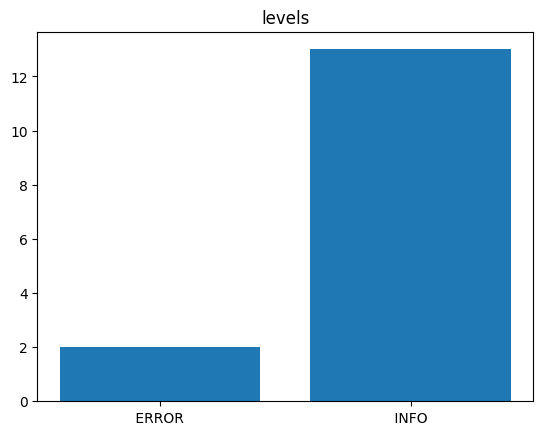

In [31]:
levels: pd.DataFrame = df.groupby('level').size()
plt.title('levels')
plt.bar(levels.axes[0], levels.values)

In [32]:
#display data
df.style.set_properties(**{'text-align':'left'})

,datetime,level,nun-1,nun-2,msg
0,2022-11-21T15:50:31.394+01:00,INFO,1578,main,e.p.LogThrower.LogThrowerApplication Starting LogThrowerApplication using Java 19.0.1 with PID 1578 (/Users/mbogudal/Dev/Woodenhand/Code/LogAnalysis/LogThrower/target/classes started by mbogudal in /Users/mbogudal/Dev/Woodenhand/Code/LogAnalysis/LogThrower)
1,2022-11-21T15:50:31.396+01:00,INFO,1578,main,"e.p.LogThrower.LogThrowerApplication No active profile set@ falling back to 1 default profile: ""default"""
2,2022-11-21T15:50:31.730+01:00,INFO,1578,main,o.s.b.w.embedded.tomcat.TomcatWebServer Tomcat initialized with port(s): 8080 (http)
3,2022-11-21T15:50:31.734+01:00,INFO,1578,main,o.apache.catalina.core.StandardService Starting service [Tomcat]
4,2022-11-21T15:50:31.734+01:00,INFO,1578,main,o.apache.catalina.core.StandardEngine Starting Servlet engine: [Apache Tomcat/10.1.1]
5,2022-11-21T15:50:31.763+01:00,INFO,1578,main,o.a.c.c.C.[Tomcat].[localhost].[/] Initializing Spring embedded WebApplicationContext
6,2022-11-21T15:50:31.764+01:00,INFO,1578,main,w.s.c.ServletWebServerApplicationContext Root WebApplicationContext: initialization completed in 340 ms
7,2022-11-21T15:50:31.882+01:00,INFO,1578,main,o.s.b.w.embedded.tomcat.TomcatWebServer Tomcat started on port(s): 8080 (http) with context path ''
8,2022-11-21T15:50:31.887+01:00,INFO,1578,main,e.p.LogThrower.LogThrowerApplication Started LogThrowerApplication in 0.689 seconds (process running for 0.846)
9,2022-11-21T15:51:05.067+01:00,INFO,1578,http-nio-8080-exec-1,o.a.c.c.C.[Tomcat].[localhost].[/] Initializing Spring DispatcherServlet 'dispatcherServlet'
